# Starters
## Import Packages

In [41]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [42]:
import scipy.stats as st
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [43]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [44]:
# Sklearn regression algorithms
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [45]:
# import needed packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
## --------------------------------------------- ##

In [46]:
def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show() 

In [47]:
class Regression:
    def __init__(self, df, apply_log):
        self.H = df
        ## Separate input features and target feature
        b = self.H.iloc[:, -1] # Target
        A = self.H.iloc[:, :-1] #all other features    
        if apply_log is True:
            b = np.log(abs(b))
        # Permute
        p = np.random.permutation(len(self.H))
        A = A.iloc[p, :]
        b = b.iloc[p]
        # Separate data into test and train sets
        n = int(len(self.H)*4/5)
        self.btrain = b.iloc[:n]
        self.Atrain = A.iloc[:n]
        self.btest = b.iloc[n:]
        self.Atest = A.iloc[n:]
        ## Re-scale the features
        scaler = MinMaxScaler(feature_range=(0,1))
        rescaledX = scaler.fit_transform(self.Atrain)
        # Convert X back to a Pandas DataFrame, for convenience
        self.Atrain = pd.DataFrame(rescaledX, index=self.Atrain.index, columns=self.Atrain.columns)
        self.Atrain=sm.add_constant(self.Atrain)        #to add constant value in the model
        # Fit multiple linear regression model
        self.OLS_model= sm.OLS(self.btrain, self.Atrain).fit() 
        print(self.OLS_model.summary())
        self.Atrain=sm.add_constant(self.Atrain)        #to add constant value in the model
        # Fit multiple linear regression model
        self.OLS_model= sm.OLS(self.btrain, self.Atrain).fit() 
        print(self.OLS_model.summary())
        # Predict
        train_predictions = self.OLS_model.predict(self.Atrain)
        print("    MAE", mean_absolute_error(self.btrain,train_predictions))
        print("    RMSE", np.sqrt(mean_squared_error(self.btrain, train_predictions)))
        print("    R2", r2_score(self.btrain, train_predictions))
        # Test: Evaluate the models against test data using MAE, RMSE and R2
        self.Atest=sm.add_constant(self.Atest)        #to add constant value in the model
        test_predictions = self.OLS_model.predict(self.Atest)
        print("    MAE", mean_absolute_error(self.btest,test_predictions))
        print("    RMSE", np.sqrt(mean_squared_error(self.btest, test_predictions)))
        print("    R2", r2_score(self.btest, test_predictions))
       
        # Residual error plots
        residual_values = self.OLS_model.resid
        fig = plt.figure(figsize=(12,8))
        self.sorted_residual_values = residual_values.sort_index()
        self.sorted_residual_values.hist(bins = 30)
        plt.title('Residual values of OLS_model')
        plt.show()
        fig = plt.figure(figsize=(12,8))
        #fig = sm.graphics.plot_regress_exog(OLS_model, Atrain, fig=fig)
        ((self.btrain-train_predictions)).hist(bins=30)
        plt.title('Distribution of test residuals')
        plt.show()

## --------------------------------------------- ##


In [48]:
sns.set_style('darkgrid')

## Import Data

In [49]:
explored_dataset = pd.read_csv('/Users/souha_kassab/OC_project3/static/csv/explored_dataset_20230211.csv', 
                               index_col=[0])

In [50]:
explored_dataset.head()

,Buildingtype,Primarypropertytype,Propertyname,Address,Zipcode,Councildistrictcode,Neighborhood,Latitude,Longitude,Yearbuilt,...,Siteenergyuse(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions
0,nonresidential,hotel,mayflower_park_hotel,405_olive_way,98101.0,7,downtown,47.61220,-122.33799,1927,...,7226362.5,2003882.00,3946027.0,1276453.0,1,1,1,0,0,249.98
1,nonresidential,hotel,paramount_hotel,724_pine_street,98101.0,7,downtown,47.61317,-122.33393,1996,...,8387933.0,0.00,3242851.0,5145082.0,1,1,1,0,0,295.86
2,nonresidential,hotel,5673-the_westin_seattle,1900_5th_avenue,98101.0,7,downtown,47.61393,-122.33810,1969,...,72587024.0,21566554.00,49526664.0,1493800.0,1,1,1,0,0,2089.28
3,nonresidential,hotel,hotel_max,620_stewart_st,98101.0,7,downtown,47.61412,-122.33664,1926,...,6794584.0,2214446.25,2768924.0,1811213.0,1,1,1,0,0,286.43
4,nonresidential,hotel,warwick_seattle_hotel_(id8),401_lenora_st,98121.0,7,downtown,47.61375,-122.34047,1980,...,14172606.0,0.00,5368607.0,8803998.0,1,1,1,0,0,505.01


In [51]:
explored_dataset.shape

(3347, 32)

In [52]:
explored_dataset.isna().sum()

Buildingtype                         0
Primarypropertytype                  0
Propertyname                         0
Address                              0
Zipcode                             16
Councildistrictcode                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
Yearbuilt                            0
Numberofbuildings                    0
Numberoffloors                       0
Propertygfatotal                     0
Propertygfaparking                   0
Listofallpropertyusetypes            0
Largestpropertyusetype               0
Largestpropertyusetypegfa            0
Secondlargestpropertyusetype         0
Secondlargestpropertyusetypegfa      0
Energystarscore                    824
Siteeui(Kbtu/Sf)                     0
Siteeuiwn(Kbtu/Sf)                   0
Siteenergyuse(Kbtu)                  0
Steamuse(Kbtu)                       0
Electricity(Kbtu)                    0
Naturalgas(Kbtu)         

# Regression using statsmodels
## Modelling emissions

In [53]:
H = explored_dataset.select_dtypes(include=['float64','int64']).dropna()
H = H[H['Totalghgemissions']>0]
H.head()

,Zipcode,Councildistrictcode,Latitude,Longitude,Yearbuilt,Numberofbuildings,Numberoffloors,Propertygfatotal,Propertygfaparking,Largestpropertyusetypegfa,...,Siteenergyuse(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions
0,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434.0,...,7226362.5,2003882.00,3946027.0,1276453.0,1,1,1,0,0,249.98
1,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,15064,83880.0,...,8387933.0,0.00,3242851.0,5145082.0,1,1,1,0,0,295.86
2,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,196718,756493.0,...,72587024.0,21566554.00,49526664.0,1493800.0,1,1,1,0,0,2089.28
3,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320.0,...,6794584.0,2214446.25,2768924.0,1811213.0,1,1,1,0,0,286.43
4,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,62000,123445.0,...,14172606.0,0.00,5368607.0,8803998.0,1,1,1,0,0,505.01


In [54]:
H.shape

(2518, 24)

/Users/souha_kassab/opt/miniconda3/envs/OC_Project2/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:      Totalghgemissions   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:42:09   Log-Likelihood:                -2714.7
No. Observations:                2014   AIC:                             5473.
Df Residuals:                    1992   BIC:                             5597.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

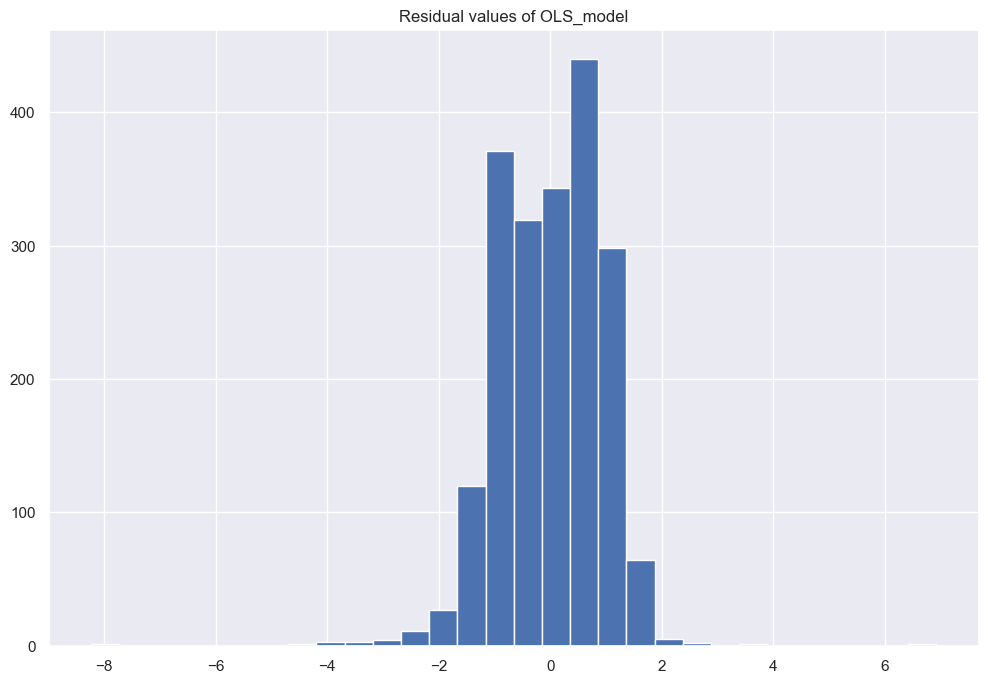

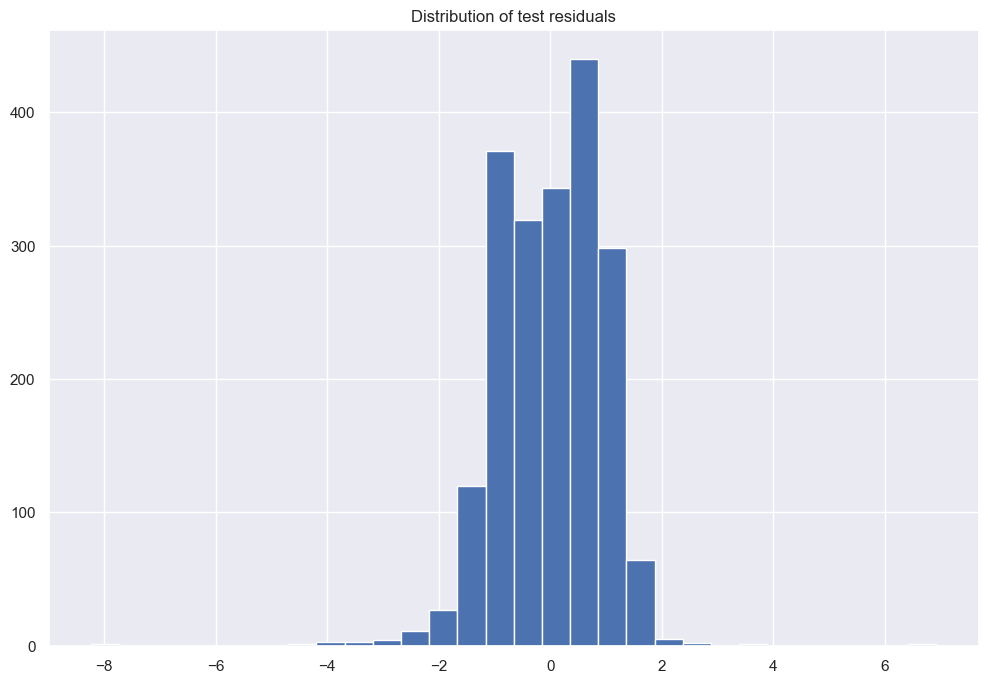

In [55]:
regression = Regression(df=H, apply_log=True)

In [56]:
regression.OLS_model.resid?

## Explore initial set of features

In [57]:
resid_H_index=regression.Atrain.loc[regression.sorted_residual_values>2].index
explored_dataset.loc[resid_H_index]

,Buildingtype,Primarypropertytype,Propertyname,Address,Zipcode,Councildistrictcode,Neighborhood,Latitude,Longitude,Yearbuilt,...,Siteenergyuse(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions
284,nonresidential,large_office,onni_1411_fourth_development_lp,1411_4th_ave,98101.0,7,downtown,47.60923,-122.33625,1929,...,5446624.0,2850077.75,2596546.0,0.0,1,1,1,0,0,238.09
220,nonresidential,large_office,norton_building,801_2nd_ave_suite_1300,98104.0,7,downtown,47.60370,-122.33447,1958,...,24906132.0,10921066.00,13985064.0,0.0,1,1,1,0,0,940.47
98,nonresidential,hospital,swedish_ballard,5300_tallman_ave_nw,98107.0,6,ballard,47.66737,-122.37956,1954,...,68090728.0,0.00,35237205.0,32853512.0,1,1,1,0,0,1990.50
3092,multifamily_mr_(5-9),mid-rise_multifamily,commodore_duchess_apartments,4005_15th_ave_ne,98105.0,4,northeast,47.65570,-122.31244,1925,...,10343027.0,8704596.00,1568735.0,69696.0,0,1,0,0,0,686.53
558,nonresidential,other,westinbuilding,2001_6th_ave,98121.0,7,downtown,47.61438,-122.33871,1981,...,274682208.0,0.00,274532495.0,149672.0,1,1,1,0,0,1921.82
247,nonresidential,large_office,metropolitan_park_east,1730_minor_avenue,98101.0,7,downtown,47.61695,-122.32965,1988,...,26823218.0,0.00,26602310.0,220905.0,1,1,1,0,0,197.19
3082,multifamily_lr_(1-4),low-rise_multifamily,building_4,400_ne_thornton_place,98125.0,5,north,47.70188,-122.32459,2008,...,13459221.0,0.00,3963184.0,9496036.0,0,1,0,0,0,531.96
3323,multifamily_mr_(5-9),mid-rise_multifamily,junction_47,4706_california_ave_sw,98116.0,1,southwest,47.56081,-122.38589,2015,...,7682562.5,0.00,4390206.0,3292117.0,0,1,1,0,0,205.45


## Cross-validation

In [59]:
X = regression.Atrain
y = regression.btrain
X.head()

,const,Zipcode,Councildistrictcode,Latitude,Longitude,Yearbuilt,Numberofbuildings,Numberoffloors,Propertygfatotal,Propertygfaparking,...,Siteeuiwn(Kbtu/Sf),Siteenergyuse(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data
2048,1.0,0.469231,0.166667,0.388283,0.496730,0.600000,0.0625,0.040404,0.008586,0.0,...,0.030681,0.001701,0.0,0.002805,0.000000,0.0,1.0,1.0,0.0,0.0
1339,1.0,0.434615,0.666667,0.968385,0.523323,0.739130,0.0625,0.030303,0.029009,0.0,...,0.042306,0.004823,0.0,0.007904,0.000000,0.0,1.0,1.0,0.0,0.0
2144,1.0,0.469231,0.166667,0.339838,0.416537,0.226087,0.0625,0.010101,0.002149,0.0,...,0.052972,0.001985,0.0,0.003269,0.000000,1.0,1.0,1.0,0.0,0.0
728,1.0,0.419231,1.000000,0.491521,0.334016,0.782609,0.0625,0.050505,0.011752,0.0,...,0.031879,0.002217,0.0,0.003647,0.000000,0.0,1.0,1.0,0.0,0.0
1995,1.0,0.469231,0.166667,0.358713,0.460462,0.521739,0.0625,0.010101,0.015260,0.0,...,0.014142,0.001797,0.0,0.002423,0.000497,1.0,1.0,1.0,0.0,0.0


In [60]:
# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score
#from sklearn.metrics import c
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Create 10 folds
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Create a model 
model = LinearRegression()

# Train and evaluate multiple models using kfolds
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results)
print("Mean:", results.mean())

[ 0.37496564  0.37184065  0.67993399  0.59685846 -1.28688259  0.43598807
  0.56654889  0.58297652  0.69599174  0.46691253]
Mean: 0.3485133903817282


In [61]:
print(cross_val_score(model, regression.Atest, regression.btest, cv=kfold, scoring='r2'))

[0.1424423  0.5987618  0.37061981 0.58482156 0.73916412 0.64047158
 0.7457242  0.71648493 0.67280719 0.34835019]


## Features Selection

### spotting multicolinearity

In [62]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns
correlatedFeatures(regression.Atrain, 0.85)

{'Electricity(Kbtu)',
 'Largestpropertyusetypegfa',
 'Siteeuiwn(Kbtu/Sf)',
 'compliant',
 'error_-_correct_default_data'}

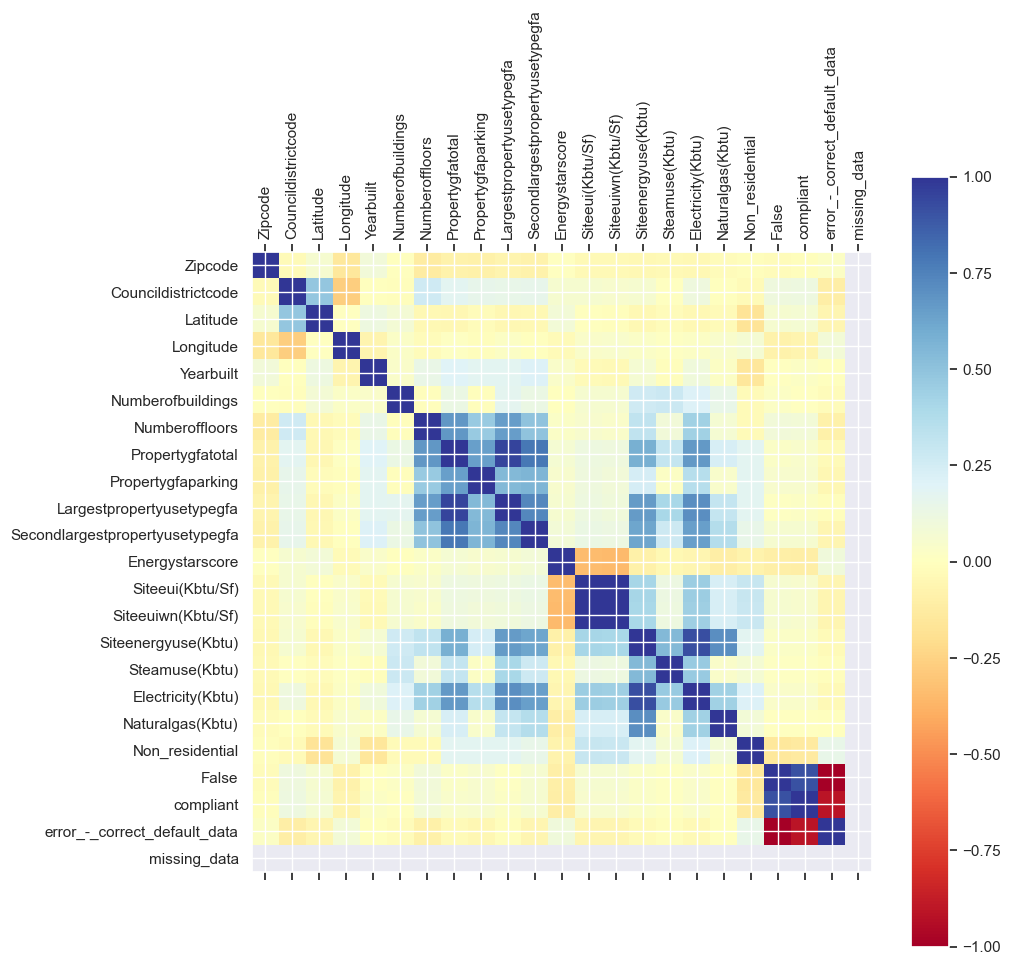

In [63]:
# To visualize with whom those features are correlated
correlationMatrix(H.iloc[:,:-1])

In [64]:
H_no_multicolinearities = H.drop(columns = ['Electricity(Kbtu)','Largestpropertyusetypegfa',
                                            'Siteeuiwn(Kbtu/Sf)','compliant',
                                            'error_-_correct_default_data', 'missing_data' ],
                                 axis=1)

                            OLS Regression Results                            
Dep. Variable:      Totalghgemissions   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:42:31   Log-Likelihood:                -2778.6
No. Observations:                2014   AIC:                             5593.
Df Residuals:                    1996   BIC:                             5694.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

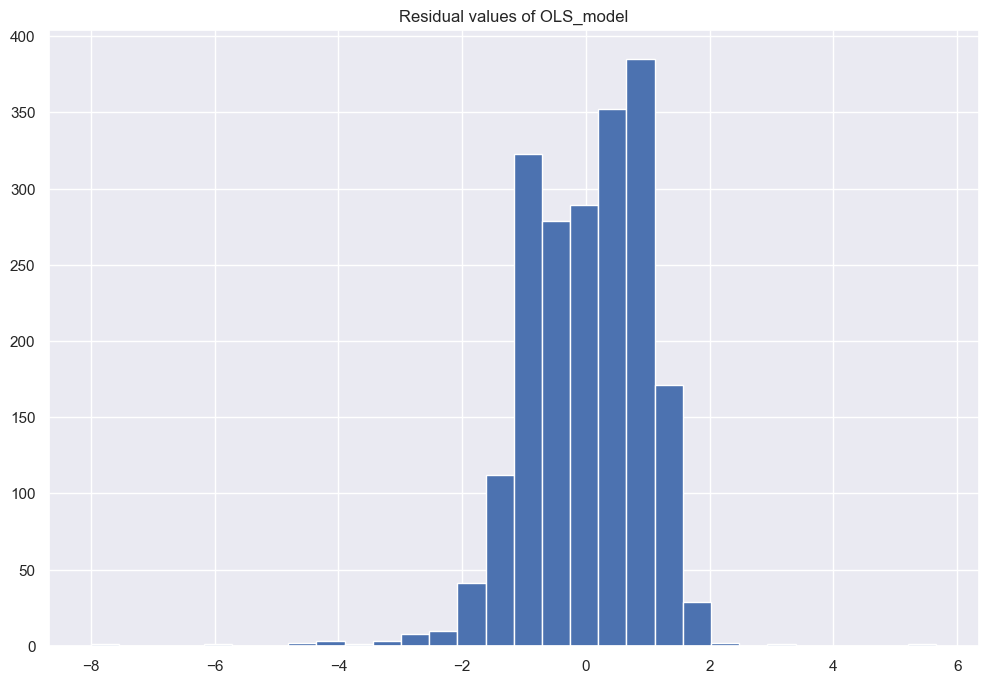

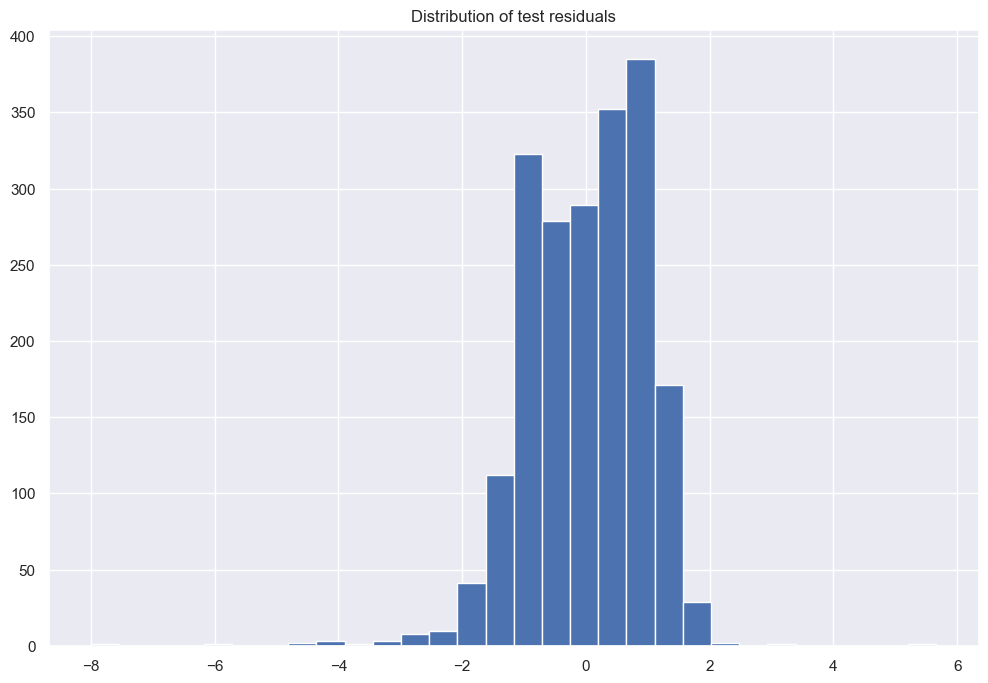

In [65]:
regression = Regression(df=H_no_multicolinearities, apply_log=True)

In [66]:
resid_H_index=regression.Atrain.loc[regression.sorted_residual_values>3].index
explored_dataset.loc[resid_H_index]

,Buildingtype,Primarypropertytype,Propertyname,Address,Zipcode,Councildistrictcode,Neighborhood,Latitude,Longitude,Yearbuilt,...,Siteenergyuse(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Non_residential,False,compliant,error_-_correct_default_data,missing_data,Totalghgemissions
3264,nonresidential,hospital,virginia_mason_medical_center_-_2149,925_seneca_st.,98101.0,3,east,47.60986,-122.32774,1920,...,163945984.0,73885472.0,90060497.0,0.0,1,1,1,0,0,6330.91
558,nonresidential,other,westinbuilding,2001_6th_ave,98121.0,7,downtown,47.61438,-122.33871,1981,...,274682208.0,0.0,274532495.0,149672.0,1,1,1,0,0,1921.82


### Variance threshold

In [67]:
# Perform feature selection using a variance threshold of 0.01 (look for features explaining very little of the total variance)
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.01))
sel.fit(regression.Atrain)

print("Feature selection", sel.get_support())
print("Selected features:", list((regression.Atrain).columns[sel.get_support()]))
print("Removed features:", list((regression.Atrain).columns[~sel.get_support()]))

Feature selection [False False  True  True  True  True False False False False False  True
 False False False False  True  True]
Selected features: ['Councildistrictcode', 'Latitude', 'Longitude', 'Yearbuilt', 'Energystarscore', 'Non_residential', 'False']
Removed features: ['const', 'Zipcode', 'Numberofbuildings', 'Numberoffloors', 'Propertygfatotal', 'Propertygfaparking', 'Secondlargestpropertyusetypegfa', 'Siteeui(Kbtu/Sf)', 'Siteenergyuse(Kbtu)', 'Steamuse(Kbtu)', 'Naturalgas(Kbtu)']


In [68]:
#H_high_variance = H.drop(columns=[ 'Zipcode', 'Numberofbuildings', 'Numberoffloors', 'Propertygfatotal', 
 #                                 'Propertygfaparking', 'Secondlargestpropertyusetypegfa', 'Siteeui(Kbtu/Sf)',
  #                                'Steamuse(Kbtu)', 'Electricity(Kbtu)', 'Naturalgas(Kbtu)'])
H_high_variance = H_no_multicolinearities.drop(columns=(regression.Atrain).columns[~sel.get_support()].drop('const'),
                     axis=1)
H_high_variance.head()

,Councildistrictcode,Latitude,Longitude,Yearbuilt,Energystarscore,Non_residential,False,Totalghgemissions
0,7,47.61220,-122.33799,1927,60.0,1,1,249.98
1,7,47.61317,-122.33393,1996,61.0,1,1,295.86
2,7,47.61393,-122.33810,1969,43.0,1,1,2089.28
3,7,47.61412,-122.33664,1926,56.0,1,1,286.43
4,7,47.61375,-122.34047,1980,75.0,1,1,505.01


                            OLS Regression Results                            
Dep. Variable:      Totalghgemissions   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:42:33   Log-Likelihood:                -2633.2
No. Observations:                2014   AIC:                             5302.
Df Residuals:                    1996   BIC:                             5403.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

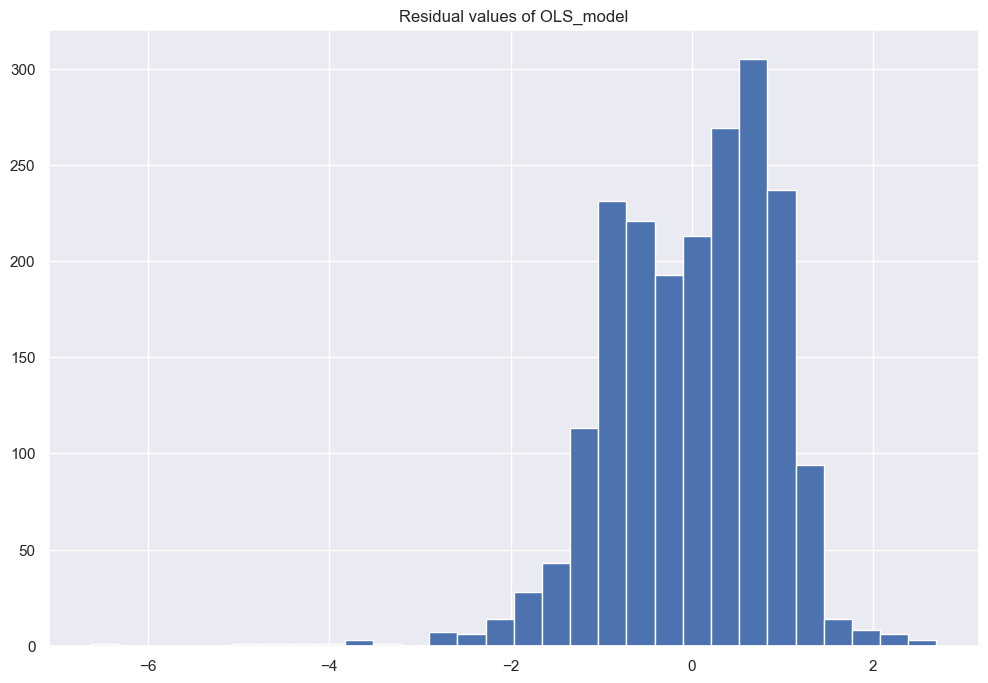

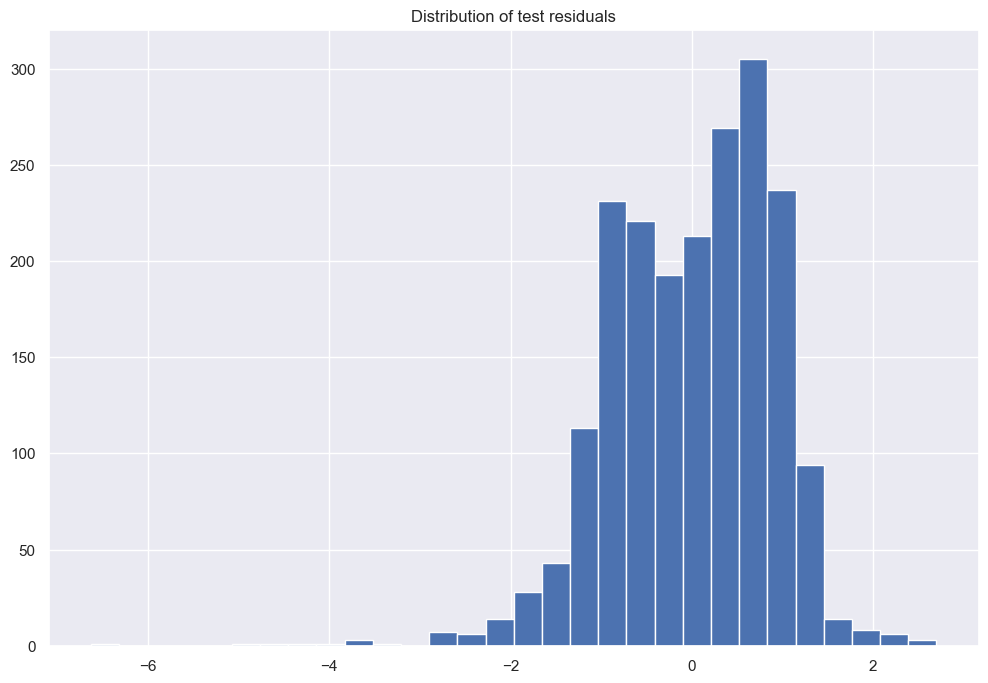

In [70]:
regression = Regression(df=H_no_multicolinearities, apply_log=True)

## Regularization

In [82]:
# Lasso
from sklearn.linear_model import LassoCV
# Split into X and y
X = H_no_multicolinearities.iloc[:, :-1].values
y = H_no_multicolinearities.iloc[:, -1].values
#X = X.loc[:, 'MS SubClass':'MS Zoning_RM']
X_dataset = X

# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

# Train test split
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Create model
model_l = LassoCV()

# Fit model
model_l.fit(X_train, y_train)
predictions = model_l.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_l.predict(X_test)
print("Test:", r2_score(y_test, predictions))

Train: 0.9999733469232592
Test: 0.9993670648265115


## Ridge regularization

                            OLS Regression Results                            
Dep. Variable:      Totalghgemissions   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     159.9
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:42:33   Log-Likelihood:                -2748.6
No. Observations:                2014   AIC:                             5533.
Df Residuals:                    1996   BIC:                             5634.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

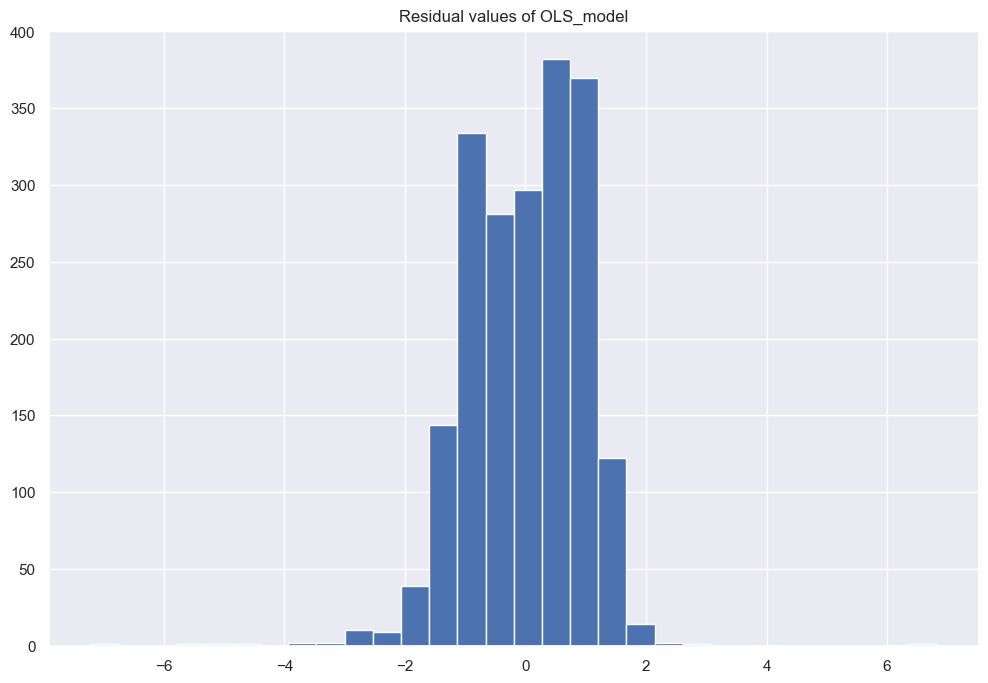

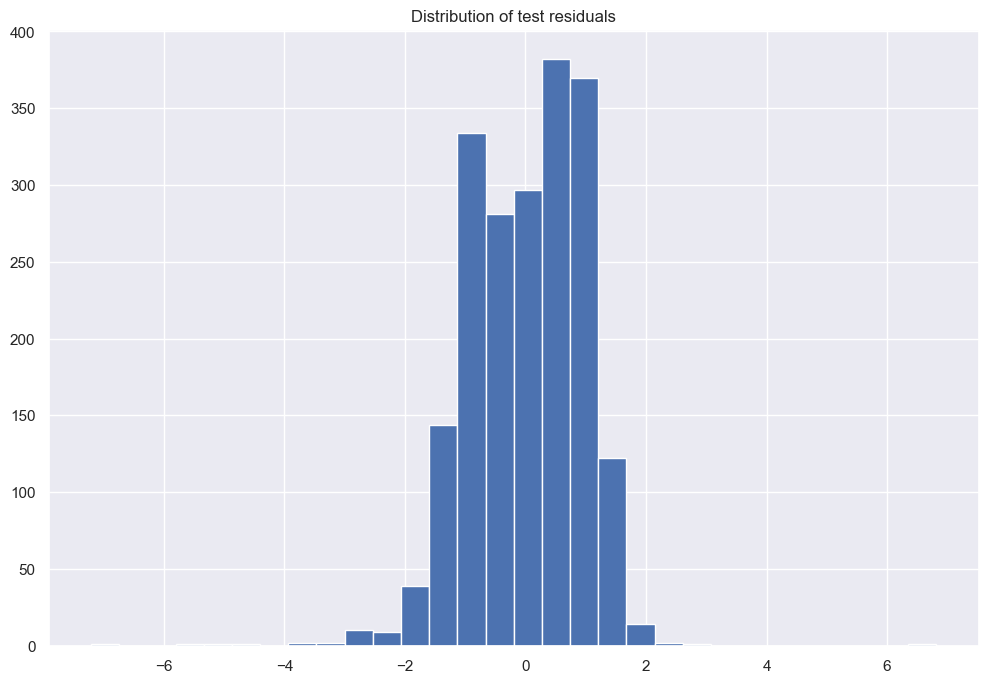

In [72]:
ridge_regression=Regression(df=H_no_multicolinearities, apply_log=True)

In [83]:
## Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

# Create model
model_ridge = Ridge(alpha=1) # alpha c'est moi qui le choisis!!

#Fit model
model_ridge.fit(X_train, y_train)
predictions = model_ridge.predict(X_train)
print("Train: \n R2", r2_score(y_train, predictions),
      "RMSE:", np.sqrt(mean_squared_error(y_train, predictions)),
      "MAE:", mean_absolute_error(y_train, predictions))
    
# Evaluate
predictions = model_ridge.predict(X_test)
print("Test: \n R2:", r2_score(y_test, predictions),
      "RMSE:", np.sqrt(mean_squared_error(y_test, predictions)),
      "MAE:", mean_absolute_error(y_test, predictions))
print("Alpha:", model_ridge.alpha)

Train: 
 R2 0.9416875898438634 RMSE: 153.98476200326934 MAE: 53.408272973256864
Test: 
 R2: 0.757997549840334 RMSE: 157.81947769991783 MAE: 60.77657159370496
Alpha: 1


## tuning hyperparameters
### Cross-validation with ridge

In [84]:
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create model
model_rcv = Ridge()

# Train and evaluate multiple models using kfolds
results = cross_val_score(model_rcv, X_train, y_train, 
                          cv=kfold, scoring='r2')
print()
print(results)
print("Mean:", results.mean())


[0.77206806 0.88095266 0.88545109 0.27567697 0.91841633]
Mean: 0.7465130220716387


In [87]:
## Gridsearch for hyperparameters tuning
# Create 5 folds
seed = 13
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Create model
model_rcv = RidgeCV(cv=kfold)

#Fit model
model_rcv.fit(X_train, y_train)
predictions = model_rcv.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_rcv.predict(X_test)
print("Test:", r2_score(y_test, predictions))

print("Alpha:", model_rcv.alpha_)

Train: 0.9957979172746277
Test: 0.9004728370758356
Alpha: 0.1


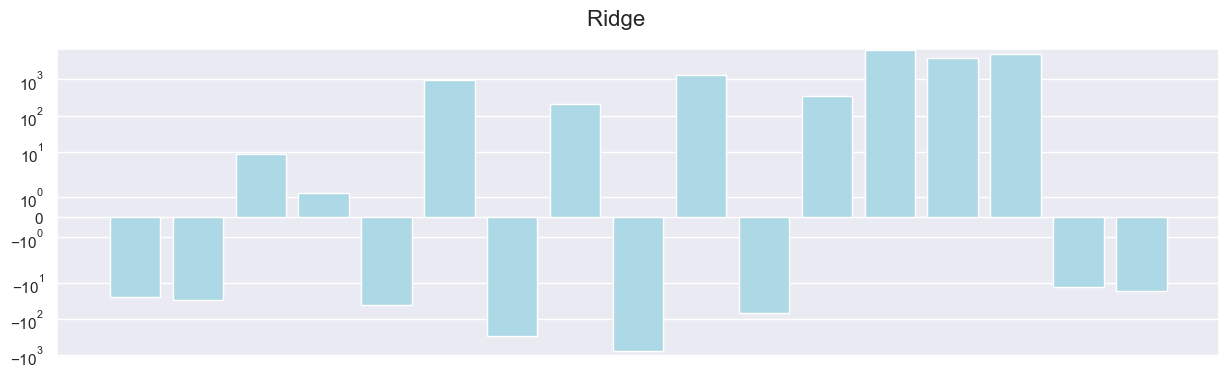

In [88]:
# Create a function to plot the magnitude of coefficients on a log scale
def plotCoef(model, info=""):
    # Plot the coeffients as bars
    fig = plt.figure(figsize=(15,4))
    fig.suptitle(type(model).__name__ + " " + info, fontsize=16)
    rects = plt.bar(np.arange(len(model.coef_)), model.coef_, color="lightblue")

    plt.gca().set_xticklabels([])
    plt.xticks([])
    
    plt.yscale('symlog')
    plt.show()
# Visualise linear regression coefficients
plotCoef(model_ridge)

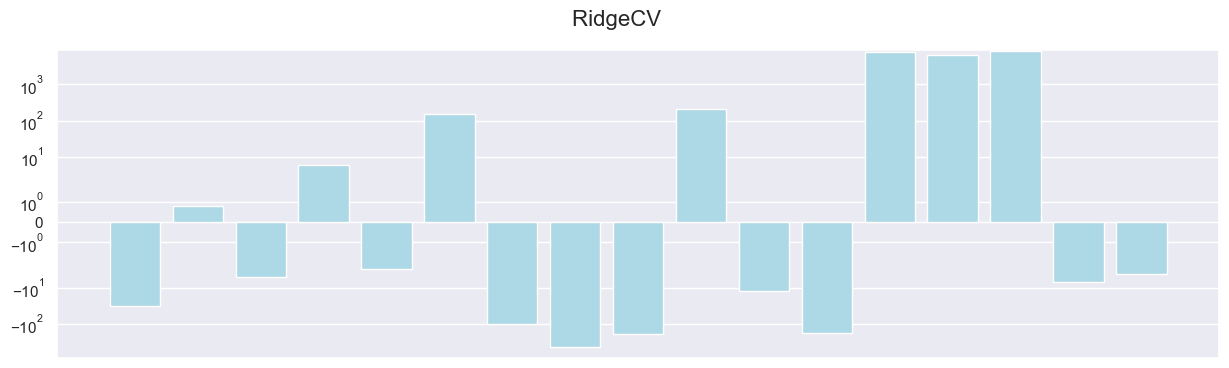

In [89]:
plotCoef(model_rcv)

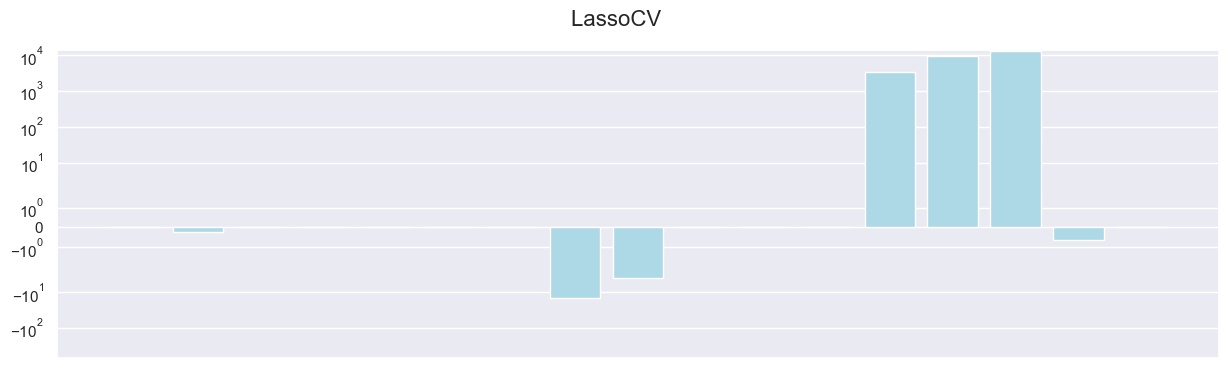

In [90]:
plotCoef(model_l)

# Gradient boost and XGboost

In [100]:
import xgboost as xgb
X, y = H_no_multicolinearities.iloc[:,:-1],H_no_multicolinearities.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


In [101]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
r_2 = r2_score(y_test, preds)
print("RMSE: %f" % (rmse),
     'R2: %f' %(r_2))


RMSE: 50.826626 R2: 0.844631


In [99]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, 
                                random_state=0, 
                                loss='squared_error' ).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))
r2_score(y_test, est.predict(X_test))

0.9440441748540895